In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
warnings.filterwarnings('ignore')

## Load and Clean Data

In [10]:
iris_load= load_iris()
iris = pd.DataFrame(iris_load.data, columns=iris_load.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
[col for col in iris.columns]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris['class']=pd.Series(iris_load.target)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Scale Data (If Needed)

In [39]:
#Scale inputs variables using Z-Score https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#x=preprocessing.StandardScaler(x)

## Split Data into Test and Train

In [36]:
#Define your dependant and independant variables
features=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
x=iris[features]
flower_class=['class']
y=iris[flower_class]

In [40]:
#split test and train data
from sklearn.model_selection import train_test_split

#The following variables need to be in this exact order to splot
x_train, x_test, y_train, y_test  = train_test_split(x,y,random_state=1)

## Find Optimal K Value

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9736842105263158, 1.0, 0.9736842105263158]


Text(0, 0.5, 'Accuracy')

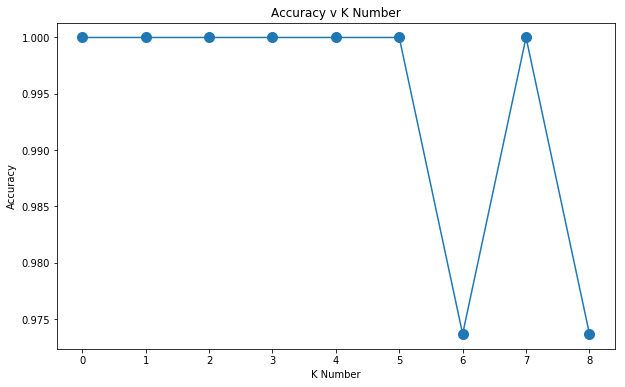

In [57]:
#Find optimal k 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc=[]
for i in range(1,10):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    Kpredict = KNN.predict(x_test)
    accuracy = accuracy_score(y_test, Kpredict)
    acc.append(accuracy)
print(acc) 

plt.figure(figsize=(10,6))
plt.plot(acc, marker='o', markersize=10)
plt.title('Accuracy v K Number')
plt.xlabel('K Number')
plt.ylabel('Accuracy')

#### As K value is very accurate for all values 1-5, we should use the lowest K value possible to conserve computational power

## Fit Model Using Optimal K 

In [52]:
# Import KNN and fit train data with K Value
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [53]:
#Test model fit using test data
y_pred=KNN.predict(x_test)

In [54]:
#understand how useful your y_pred results correspond to your y_test
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

   micro avg       1.00      1.00      1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Graph Outputs 

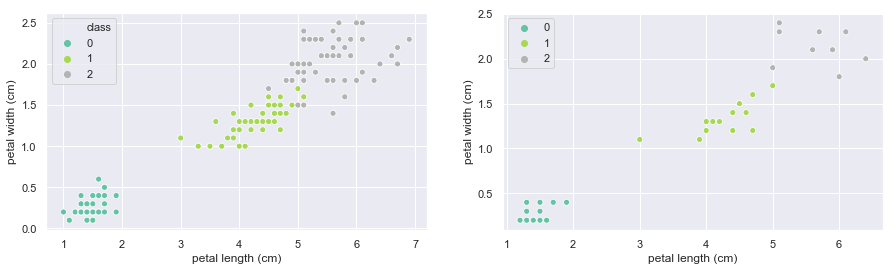

In [65]:
#https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.set()
cmap = sns.cubehelix_palette(dark=.8, light=.3, as_cmap=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.scatterplot(x = iris['petal length (cm)'], y = iris['petal width (cm)'], hue = iris['class'], palette="Set2",ax=axs[0])
sns.scatterplot(x = x_test['petal length (cm)'], y = x_test['petal width (cm)'], hue = y_pred,palette="Set2", ax=axs[1]);

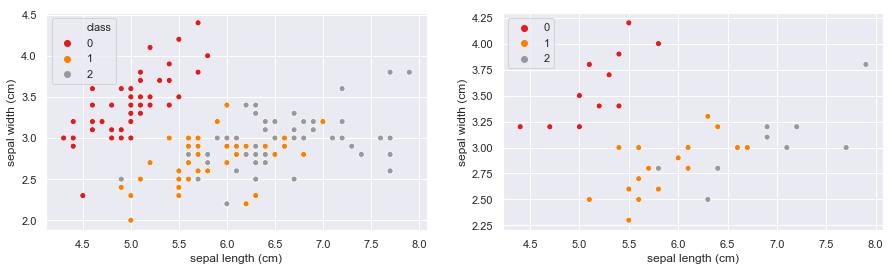

In [67]:
sns.set()
cmap = sns.cubehelix_palette(dark=.8, light=.3, as_cmap=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.scatterplot(x = iris['sepal length (cm)'], y = iris['sepal width (cm)'], hue = iris['class'], palette="Set1",ax=axs[0])
sns.scatterplot(x = x_test['sepal length (cm)'], y = x_test['sepal width (cm)'], hue = y_pred,palette="Set1", ax=axs[1]);